In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2025-02-12 12:18:48.254850: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-12 12:18:48.741972: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-02-12 12:18:48.742006: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-02-12 12:18:51.466832: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2025-

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
(X_train_all,y_train_all),(X_test,y_test)= fashion_mnist

In [4]:
X_train_all.shape

(60000, 28, 28)

In [26]:
X_train,y_train = X_train_all[:-5000],y_train_all[:-5000]
X_valid,y_valid=X_train_all[-5000:],y_train_all[-5000:]

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

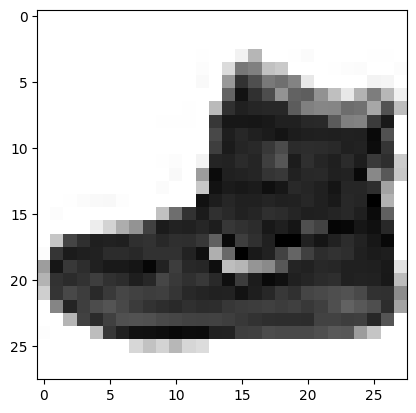

In [8]:
plt.imshow(X_train[0],cmap='binary')

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

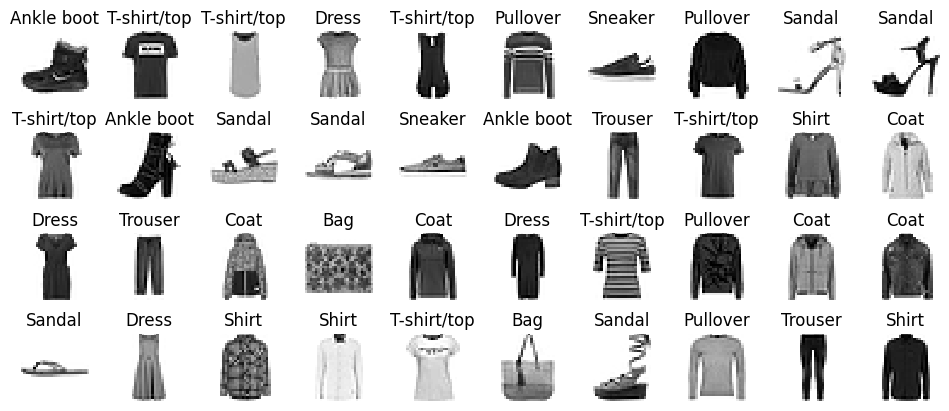

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [27]:
tf.keras.backend.clear_session()

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [28]:
model.layers

In [29]:
h1=model.layers[1]
h1.name

'dense'

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
from tensorflow.keras.utils import to_categorical 

In [32]:
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)

In [33]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((55000, 28, 28), (55000, 10), (5000, 28, 28), (5000, 10))

In [34]:
history= model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 16s 9ms/step - loss: 2.1645 - accuracy: 0.6881 - val_loss: 0.7219 - val_accuracy: 0.7312
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.6611 - accuracy: 0.7518 - val_loss: 0.6158 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5394 - accuracy: 0.8100 - val_loss: 0.5206 - val_accuracy: 0.8232
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5018 - accuracy: 0.8255 - val_loss: 0.5151 - val_accuracy: 0.8244
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4559 - accuracy: 0.8407 - val_loss: 0.4701 - val_accuracy: 0.8338
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4340 - accuracy: 0.8505 - val_loss: 0.4215 - val_accuracy: 0.8558
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4155 - accuracy: 0.8556 - val_loss: 0.4832 - val_ac

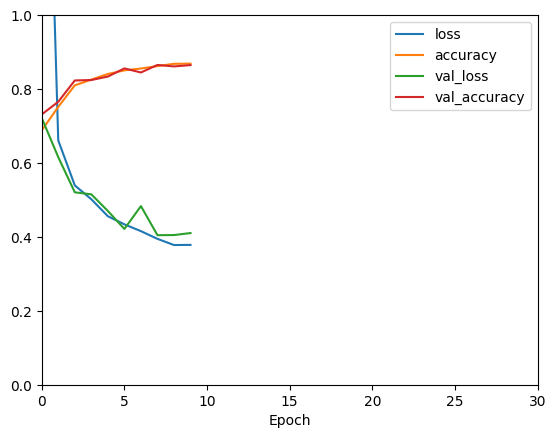

In [35]:
import pandas as pd
df=pd.DataFrame(history.history)
import matplotlib.pyplot as plt
df.plot(xlim=[0,30],ylim=[0,1],xlabel='Epoch')
plt.show()

In [36]:
preds=model.predict(X_test)
preds[:4]

313/313 [==============================] - 1s 3ms/step


array([[1.7459347e-21, 5.2829657e-27, 6.3988852e-25, 2.4881824e-30,
        2.4672397e-21, 2.4628508e-04, 3.4901978e-22, 9.6377935e-03,
        1.4939319e-07, 9.9011582e-01],
       [2.6281925e-05, 1.9660838e-05, 9.8776335e-01, 5.4918169e-06,
        8.7873843e-03, 2.8867556e-29, 3.3977914e-03, 0.0000000e+00,
        1.6113065e-14, 3.1263868e-32],
       [4.0723323e-24, 9.9999994e-01, 4.5213007e-24, 2.6962506e-17,
        4.8037283e-24, 0.0000000e+00, 1.5865689e-24, 0.0000000e+00,
        1.5941153e-17, 0.0000000e+00],
       [2.6181651e-17, 9.9999994e-01, 2.7297404e-17, 1.8267675e-12,
        1.5953563e-17, 0.0000000e+00, 1.7066516e-17, 0.0000000e+00,
        9.9690861e-13, 0.0000000e+00]], dtype=float32)

In [37]:
from sklearn.metrics import classification_report
y_pred=preds.argmax(axis=-1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.77      0.76      0.76      1000
           3       0.81      0.91      0.86      1000
           4       0.83      0.67      0.74      1000
           5       0.98      0.94      0.96      1000
           6       0.61      0.65      0.63      1000
           7       0.92      0.97      0.94      1000
           8       0.94      0.96      0.95      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

